In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fft import fft2, ifft2
from tqdm import tqdm
from random import random

In [16]:
Nx = 128
Ny = 128
Lx = 8 * np.pi
Ly = 8 * np.pi
dx = Lx / Nx
dy = Ly / Ny

dt = 0.01
t = 100

c = np.ones((Nx, Ny, int(t/dt))) * 0.7
h = np.ones((Nx, Ny, int(t/dt))) * 0.2
w = np.ones((Nx, Ny, int(t/dt))) * 0.1

theta = np.linspace(0, Lx/Nx, Nx)
'''
for i in range(Nx):
    for j in range(Ny):
        c[i, j, 0] = np.sin(2 * dx * i) * np.sin(dy * j) * 2
        h[i, j, 0] = np.sin(dx * i) * np.sin(dy * j) * 2
        w[i, j, 0] = np.sin(dx * i) * np.sin(dy * j) * 1
'''

for i in range(int(Nx/10), int(Nx/5)):
    for j in range(int(Nx/10), int(Nx/5)):
        #c[i, j, 0] = c[i, j, 0] + np.sin(2 * dx * i) * np.sin(2 * dy * j) * 0.4
        h[i, j, 0] = h[i, j, 0] + np.sin(2 * dx * i) * np.sin(2 * dy * j) * 0.4
    

'''
for i in range(Nx):
    for j in range(Ny):
        c[i, j, 0] = c[i, j, 0] + np.sin(5 * dx * i) * np.sin(5 * dy * j) * 0.01
        w[i, j, 0] = w[i, j, 0] + np.cos(5 * dx * i) * np.cos(5 * dy * j) * 0.01
        h[i, j, 0] = h[i, j, 0] + np.sin(5 * dx * i) * np.cos(5 * dy * j) * 0.01
'''

for i in range(Nx):
    for j in range(Ny):
        c[i, j, 0] = c[i, j, 0] + random() * 0.2
        w[i, j, 0] = w[i, j, 0] + random() * 0.2
        h[i, j, 0] = h[i, j, 0] + random() * 0.2

Dc = 0.001
Dh = 0.001
Dw = 0.001

A = 0.15
B = 1

ck = fft2(c[:, :, 0])
hk = fft2(h[:, :, 0])
wk = fft2(w[:, :, 0])

kx = np.fft.fftfreq(Nx, dx) * np.pi * 2
ky = np.fft.fftfreq(Ny, dy) * np.pi * 2
k2 = np.zeros((Nx, Ny), float)

for i in range(Nx):
    for j in range(Ny):
        k2[i, j] = kx[i]**2 + ky[j]**2



# Initialize

# Linear term for c, h, w
Lc = Dc * (-k2) * dt
Lh = Dh * (-k2) * dt
Lw = Dw * (-k2) * dt

# Nonlinear term, N(t), N(t-\delta t) for c, h, w
N_c = fft2(A * w[:, :, 0] - B * c[:, :, 0] * h[:, :, 0]**2)
N_h = fft2(B * c[:, :, 0] * h[:, :, 0]**2 - h[:, :, 0] * w[:, :, 0])
N_w = fft2(h[:, :, 0] * w[:, :, 0] - A * w[:, :, 0] - B * c[:, :, 0])

ck = (Lc * ck + N_c) * dt + ck
hk = (Lh * hk + N_h) * dt + hk
wk = (Lw * wk + N_w) * dt + wk

c[:,:,0] = np.real(ifft2(ck))
h[:,:,0] = np.real(ifft2(hk))
w[:,:,0] = np.real(ifft2(wk))


# Iterate from t = dt
for i in tqdm(range(1, int(t / dt)), position=0):
    c[:,:,i] = np.real(ifft2(ck))
    h[:,:,i] = np.real(ifft2(hk))
    w[:,:,i] = np.real(ifft2(wk))
    
    # Nonlinear term, N(t), N(t-\delta t) for c, h, w
    N_c_past = N_c
    N_c = fft2(A * w[:, :, i] - B * c[:, :, i] * h[:, :, i]**2)
    N_h_past = N_h
    N_h = fft2(B * c[:, :, i] * h[:, :, i]**2 - h[:, :, i] * w[:, :, i])
    N_w_past = N_w
    N_w = fft2(h[:, :, i] * w[:, :, i] - A * w[:, :, i] - B * c[:, :, i])
    
    ck = ((1 + Lc * (1/2)) * ck + (3 * N_c - 3 * N_c_past) * (1/2) * dt) / (1 - Lc * (1/2))
    hk = ((1 + Lh * (1/2)) * hk + (3 * N_h - 3 * N_h_past) * (1/2) * dt) / (1 - Lh * (1/2))
    wk = ((1 + Lw * (1/2)) * wk + (3 * N_w - 3 * N_w_past) * (1/2) * dt) / (1 - Lw * (1/2))

if np.isnan(ck).any():
    print("Error, encounter NaN")


100%|██████████| 9999/9999 [01:24<00:00, 117.86it/s]


In [ ]:
#print(c[100,:,:])
print(c[100,0, 100] + w[100,0, 100] + h[100,0, 100])

1.4046121770477427


In [18]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots()
#line = ax.pcolormesh(c[:,:,0]) 
#line = plt.imshow(c[:, :, 0])
img = ax.imshow(c[:, :, 0],  cmap='plasma')
#colorbar = fig.colorbar(img, ax=ax)
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

#colorbar = plt.colorbar()
#cbar = fig.colorbar(line, ax=ax)

def init():
    img = ax.imshow(h[:, :, 0],  cmap='plasma')
    #colorbar = fig.colorbar(img)
    fig.colorbar(img, cax=cax)
    #colorbar.mappable.set_array(c[:, :, 0])
    return [img]
    #return [line]

def plotFrame(i):
    img = ax.imshow(h[:, :, i], cmap='plasma')
    fig.colorbar(img, cax=cax)
    #colorbar.mappable.set_array(c[:, :, i])
    
    return [img]
    #return [line]

video = FuncAnimation(fig, plotFrame, interval=100, frames=tqdm(range(0, int(t/dt), 500), initial=0, position=0), blit=False, init_func=init)
#video.save('euler_adam.mp4', fps=10) 
plt.close()
display(HTML(video.to_html5_video()))

 95%|█████████▌| 19/20 [00:17<00:01,  1.10s/it]


  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:00<00:00, 14322.87it/s]


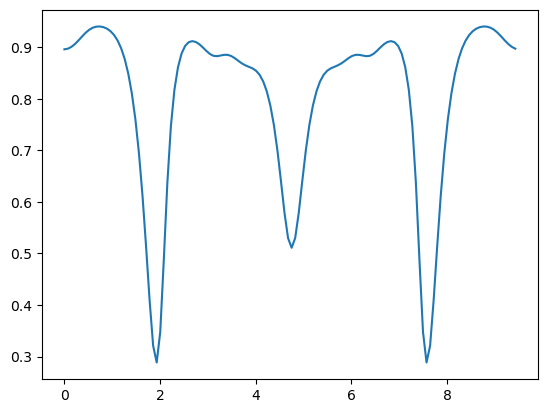

In [57]:
# Finite Difference

from scipy.fft import fft, ifft
from scipy import optimize

N  = 128
L  = 3 * np.pi
dx = L / N
dt = 0.1
t  = 500

c = np.ones(N) * 0.9
w = np.ones(N) * 0.1
h = np.ones(N) * 0.0


h[int(N/2)] = 0.5
h[int(N/2-1)] = 0.4
h[int(N/2+1)] = 0.4
h[int(N/2-2)] = 0.3
h[int(N/2+2)] = 0.3
h[int(N/2-3)] = 0.2
h[int(N/2+3)] = 0.2


c = 1 - w - h

Dc = 0.001
Dh = 0.001
Dw = 0.001

A = 0.15
B = 1

c_result = np.zeros((N, int(t/dt/10)))
h_result = np.zeros((N, int(t/dt/10)))
w_result = np.zeros((N, int(t/dt/10)))


for j in tqdm(range(int(t/dt))):

    # Linear term for c, h, w
    Lc = Dc * (np.roll(c, 1) + np.roll(c, -1) - 2 * c) / (dx**2)
    Lh = Dh * (np.roll(h, 1) + np.roll(h, -1) - 2 * h) / (dx**2)
    Lw = Dw * (np.roll(w, 1) + np.roll(w, -1) - 2 * w) / (dx**2)
    #print(Lc, Lh, Lw)

    # Nonlinear term, N(t), N(t-\delta t) for c, h, w
    


    c = c + (A * w - B * c * h**2 + Lc) * dt
    h = h + (B * c * h**2 - h * w + Lh) * dt 
    w = w + (h * w - A * w + Lw) * dt

    if (j % 10) == 0:
        c_result[:, int(j/10)] = c
        h_result[:, int(j/10)] = h
        w_result[:, int(j/10)] = w

    if np.isnan(c).any():
        print("Error, encounter NaN")
        print(j)
        break

x = np.linspace(0, L, N)
plt.plot(x, c_result[:, -1])


In [58]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.animation import FuncAnimation, FFMpegWriter
fig, ax = plt.subplots()


def init():
    img = ax.plot(x, h_result[:, 0])
    ax.set_ylim(0, 1)
    return [img]

def plotFrame(i):
    ax.clear()
    img = ax.plot(x, h_result[:, i])
    ax.set_ylim(0, 1)
    return [img]

video = FuncAnimation(fig, plotFrame, interval=100, frames=tqdm(np.linspace(0, int(t/dt/10)-1, 300, dtype=int), initial=0, position=0), blit=False, init_func=init)

plt.close()
display(HTML(video.to_html5_video()))
writervideo = FFMpegWriter(fps=30)
video.save(f'triggerwave_slow_down.mp4', writer=writervideo) 

  0%|          | 0/300 [00:00<?, ?it/s]

 98%|█████████▊| 295/300 [00:08<00:00, 38.74it/s]

 98%|█████████▊| 295/300 [00:20<00:00, 38.74it/s]

100%|██████████| 50000/50000 [00:41<00:00, 1197.81it/s]


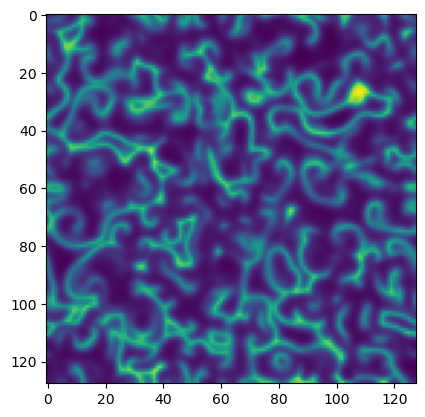

In [110]:
# Finite Difference 2D

from scipy.fft import fft, ifft
from scipy import optimize

Nx = 128
Ny = 128
Lx = 10 * np.pi
Ly = 10 * np.pi
dx = Lx / Nx
dy = Ly / Ny

dt = 0.1
t  = 5000

c = np.ones((N, N)) * 0.9
w = np.ones((N, N)) * 0.1
h = np.ones((N, N)) * 0.0

pyramid = np.array([[0.2, 0.2, 0.2, 0.2, 0.2],
                    [0.2, 0.6, 0.6, 0.6, 0.2],
                    [0.2, 0.6, 0.9, 0.6, 0.2],
                    [0.2, 0.6, 0.6, 0.6, 0.2],
                    [0.2, 0.2, 0.2, 0.2, 0.2]])

for i in range(5):
    x = int(random() * Nx)
    y = int(random() * Ny)
    h[x:x+5, y:y+5] = pyramid


c = 1 - w - h

Dc = 0.001
Dh = 0.001
Dw = 0.001

A = 0.15
B = 1

c_result = np.zeros((N, N, int(t/dt/10)))
h_result = np.zeros((N, N, int(t/dt/10)))
w_result = np.zeros((N, N, int(t/dt/10)))


for j in tqdm(range(int(t/dt))):

    # Linear term for c, h, w
    Lc_y = Dc * (np.roll(c, 1, axis=0) + np.roll(c, -1, axis=0) - 2 * c) / (dy**2)
    Lh_y = Dh * (np.roll(h, 1, axis=0) + np.roll(h, -1, axis=0) - 2 * h) / (dy**2)
    Lw_y = Dw * (np.roll(w, 1, axis=0) + np.roll(w, -1, axis=0) - 2 * w) / (dy**2)

    Lc_x = Dc * (np.roll(c, 1, axis=1) + np.roll(c, -1, axis=1) - 2 * c) / (dx**2)
    Lh_x = Dh * (np.roll(h, 1, axis=1) + np.roll(h, -1, axis=1) - 2 * h) / (dx**2)
    Lw_x = Dw * (np.roll(w, 1, axis=1) + np.roll(w, -1, axis=1) - 2 * w) / (dx**2)

    Lc = Lc_x + Lc_y
    Lh = Lh_x + Lh_y
    Lw = Lw_x + Lw_y

    c = c + (A * w - B * c * h**2 + Lc) * dt
    h = h + (B * c * h**2 - h * w + Lh) * dt 
    w = w + (h * w - A * w + Lw) * dt

    if (j % 10) == 0:
        c_result[:, :, int(j/10)] = c
        h_result[:, :, int(j/10)] = h
        w_result[:, :, int(j/10)] = w

    if np.isnan(c).any():
        print("Error, encounter NaN")
        print(j)
        break

x = np.linspace(0, L, N)
plt.imshow(h_result[:, :, -1])

In [111]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots()
#line = ax.pcolormesh(c[:,:,0]) 
#line = plt.imshow(c[:, :, 0])
img = ax.imshow(h_result[:, :, 0], vmin=0, vmax=1, extent=(0,Lx,0,Ly), cmap='plasma')
#colorbar = fig.colorbar(img, ax=ax)
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

#colorbar = plt.colorbar()
#cbar = fig.colorbar(line, ax=ax)

def init():
    img = ax.imshow(h_result[:, :, 0], vmin=0, vmax=1, extent=(0,Lx,0,Ly),  cmap='plasma')
    #colorbar = fig.colorbar(img)
    fig.colorbar(img, cax=cax)
    #colorbar.mappable.set_array(c[:, :, 0])
    return [img]
    #return [line]

def plotFrame(i):
    img = ax.imshow(h_result[:, :, i], vmin=0, vmax=1, extent=(0,Lx,0,Ly), cmap='plasma')
    fig.colorbar(img, cax=cax)
    #colorbar.mappable.set_array(c[:, :, i])
    
    return [img]
    #return [line]

video = FuncAnimation(fig, plotFrame, interval=100, frames=tqdm(np.linspace(0, int(t/dt/10)-1, 20, dtype=int), initial=0, position=0), blit=False, init_func=init)
#video.save('RD_2D.mp4', fps=10) 
plt.close()
display(HTML(video.to_html5_video()))

 95%|█████████▌| 19/20 [00:04<00:00,  3.71it/s]

In [56]:
a = np.linspace(1, 10, 10)
a = np.outer(a, a)

print(np.roll(a, 0))
print(np.roll(a, 1, axis=0))
print(np.roll(a, 1, axis=1))

[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]
[[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72